<html>
<head>
  <style>
    body {
      font-family: Arial, sans-serif;
      margin: 20px;
      background-color: #f5f5f5;
    }

    h1 {
      font-size: 28px;
      color: #333;
      margin-bottom: 20px;
      text-align: center;
      text-transform: uppercase;
    }

    h2 {
      font-size: 24px;
      color: #555;
      margin-bottom: 15px;
    }

    p {
      font-size: 18px;
      color: #777;
      margin-bottom: 15px;
    }

    ol {
      list-style-type: decimal;
      padding-left: 40px;
    }

    li {
      font-size: 18px;
      color: #555;
      margin-bottom: 10px;
    }
  </style>
</head>
<body>
  <h1>Disease Prediction Notebook</h1>
  <p>Welcome to the Disease Prediction Notebook!</p>
  <p>This notebook is dedicated to the task of disease prediction based on a given dataset. The primary goal of this notebook is to build predictive models that can accurately identify and predict the occurrence of specific diseases.</p>
  
  <h2>Notebook Steps:</h2>
  <ol>
    <li>Data Loading</li>
    <li>Data Exploration</li>
    <li>Advanced Data Visualization</li>
    <li>Model Training and Evaluation</li>
    <li>Model Comparison and Selection</li>
    <li>Prediction and Interpretation</li>
    <li>Conclusion and Recommendations</li>
  </ol>
  
  <h2>Explanation:</h2>
  <p>The notebook follows a structured approach to disease prediction, starting with data loading and exploration. Advanced data visualization techniques are then applied to gain insights into the dataset. Models are trained and evaluated using machine learning algorithms, and the best-performing model is selected. The chosen model is used for predicting disease occurrence on new data, and the results are interpreted to understand the factors influencing the predictions. Finally, the notebook concludes with recommendations based on the analysis results.</p>
</body>
</html>


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


## Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\aniket chauhan\OneDrive\Desktop\machine learning\Training.csv")
df.drop('Unnamed: 133', axis=1, inplace=True)


## Exploratory Data Analysis (EDA) ¶
 

In [3]:
print(df.describe())
print('---------------------------------------------------------------')
print(df.info())
print('---------------------------------------------------------------')
print(df.columns)
print('---------------------------------------------------------------')

           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593 

<hr>
<h3>Summary of the Dataset:</h3>
<ul>
  <li>Number of Entries (Rows): 4920</li>
  <li>Number of Columns: 133</li>
</ul>
<h4>Column Information:</h4>
<ul>
  <li>Column Names: <i>itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills,</i> and more...</li>
  <li>Data Types: <i>132 columns with integer values, 1 column with object (prognosis)</i></li>
</ul>
<h4>Data Description:</h4>
<ul>
  <li>Count, Mean, Standard Deviation, Minimum, 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum values are available for each column.</li>
</ul>

<table>
  <tr>
    <th>Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>itching</td>
    <td>An uncomfortable sensation on the skin that prompts scratching.</td>
  </tr>
  <tr>
    <td>skin_rash</td>
    <td>Redness, inflammation, or discoloration of the skin.</td>
  </tr>
  <tr>
    <td>nodal_skin_eruptions</td>
    <td>Abnormal eruptions or swelling on the skin.</td>
  </tr>
  <tr>
    <td>continuous_sneezing</td>
    <td>Repetitive and involuntary expulsions of air through the nose.</td>
  </tr>
  <tr>
    <td>shivering</td>
    <td>Involuntary tremors or shaking of the body.</td>
  </tr>
  <tr>
    <td>chills</td>
    <td>Episodes of shivering accompanied by cold sensations and shuddering.</td>
  </tr>
  <tr>
    <td>joint_pain</td>
    <td>Pain or discomfort in the joints of the body.</td>
  </tr>
  <tr>
    <td>stomach_pain</td>
    <td>Pain or discomfort in the abdominal area.</td>
  </tr>
  <tr>
    <td>acidity</td>
    <td>Excess production of acid in the stomach, leading to indigestion.</td>
  </tr>
  <tr>
    <td>ulcers_on_tongue</td>
    <td>Sores or lesions on the tongue.</td>
  </tr>
  <tr>
    <td>muscle_wasting</td>
    <td>Loss or deterioration of muscle mass.</td>
  </tr>
  <tr>
    <td>vomiting</td>
    <td>Forceful expulsion of stomach contents through the mouth.</td>
  </tr>
  <tr>
    <td>burning_micturition</td>
    <td>Discomfort or pain during urination.</td>
  </tr>
  <tr>
    <td>spotting_ urination</td>
    <td>Presence of blood in the urine.</td>
  </tr>
  <tr>
    <td>fatigue</td>
    <td>Extreme tiredness or lack of energy.</td>
  </tr>
  <tr>
    <td>weight_gain</td>
    <td>Unintentional increase in body weight.</td>
  </tr>
  <tr>
    <td>anxiety</td>
    <td>Feelings of unease, worry, or fear.</td>
  </tr>
  <tr>
    <td>cold_hands_and_feets</td>
    <td>Sensation of coldness or numbness in the hands and feet.</td>
  </tr>
  <tr>
    <td>mood_swings</td>
    <td>Rapid and unpredictable changes in emotions or mood.</td>
  </tr>
  <tr>
    <td>weight_loss</td>
    <td>Unintentional loss of body weight.</td>
  </tr>
  <tr>
    <td>restlessness</td>
    <td>Inability to stay calm or relax.</td>
  </tr>
  <tr>
    <td>lethargy</td>
    <td>Lack of energy, enthusiasm, or motivation.</td>
  </tr>
  <tr>
    <td>patches_in_throat</td>
    <td>Irregular or discolored areas on the throat.</td>
  </tr>
  <tr>
    <td>irregular_sugar_level</td>
    <td>Fluctuations or abnormalities in blood sugar levels.</td>
  </tr>
  <tr>
    <td>cough</td>
    <td>Expulsion of air from the lungs with a sudden, sharp sound.</td>
  </tr>
  <tr>
    <td>high_fever</td>
    <td>Elevated body temperature above the normal range.</td>
  </tr>
  <tr>
    <td>sunken_eyes</td>
    <td>Concave appearance of the eyes, usually due to dehydration.</td>
  </tr>
  <tr>
    <td>breathlessness</td>
    <td>Difficulty or discomfort in breathing.</td>
  </tr>
  <tr>
    <td>sweating</td>
    <td>Production of perspiration from the sweat glands.</td>
  </tr>
  <tr>
    <td>dehydration</td>
    <td>Lack of adequate fluids in the body.</td>
  </tr>
  <tr>
    <td>indigestion</td>
    <td>Discomfort or pain in the digestive system.</td>
  </tr>
  <tr>
    <td>headache</td>
    <td>Ache or pain in the head.</td>
  </tr>
  <tr>
    <td>yellowish_skin</td>
    <td>Abnormal yellow discoloration of the skin.</td>
  </tr>
  <tr>
    <td>dark_urine</td>
    <td>Urine that appears darker than usual.</td>
  </tr>
  <tr>
    <td>nausea</td>
    <td>Feeling of sickness or queasiness.</td>
  </tr>
  <tr>
    <td>loss_of_appetite</td>
    <td>Reduced desire to eat or lack of interest in food.</td>
  </tr>
  <tr>
    <td>pain_behind_the_eyes</td>
    <td>Discomfort or pain located behind the eyes.</td>
  </tr>
  <tr>
    <td>back_pain</td>
    <td>Discomfort or pain in the back.</td>
  </tr>
  <tr>
    <td>constipation</td>
    <td>Difficulty in passing stools or infrequent bowel movements.</td>
  </tr>
  <tr>
    <td>abdominal_pain</td>
    <td>Pain or discomfort in the abdominal area.</td>
  </tr>
  <tr>
    <td>diarrhoea</td>
    <td>Passing of loose, watery stools.</td>
  </tr>
  <tr>
    <td>mild_fever</td>
    <td>Low-grade fever or a slightly elevated body temperature.</td>
  </tr>
  <tr>
    <td>yellow_urine</td>
    <td>Urine that appears yellow or darker than usual.</td>
  </tr>
  <tr>
    <td>yellowing_of_eyes</td>
    <td>Yellow discoloration of the whites of the eyes.</td>
  </tr>
  <tr>
    <td>acute_liver_failure</td>
    <td>Sudden and severe liver dysfunction.</td>
  </tr>
  <tr>
    <td>fluid_overload</td>
    <td>Excessive fluid accumulation in the body.</td>
  </tr>
  <tr>
    <td>swelling_of_stomach</td>
    <td>Abnormal enlargement or bloating of the stomach.</td>
  </tr>
  <tr>
    <td>swelled_lymph_nodes</td>
    <td>Enlarged lymph nodes, often indicating an immune response.</td>
  </tr>
  <tr>
    <td>malaise</td>
    <td>General feeling of discomfort, illness, or unease.</td>
  </tr>
  <tr>
    <td>blurred_and_distorted_vision</td>
    <td>Visual impairment characterized by unclear or distorted images.</td>
  </tr>
  <tr>
    <td>phlegm</td>
    <td>Thick, sticky mucus secreted by the respiratory passages.</td>
  </tr>
  <tr>
    <td>throat_irritation</td>
    <td>Discomfort or tickling sensation in the throat.</td>
  </tr>
  <tr>
    <td>redness_of_eyes</td>
    <td>Red or bloodshot appearance of the eyes.</td>
  </tr>
  <tr>
    <td>sinus_pressure</td>
    <td>Feeling of fullness or pressure in the sinuses.</td>
  </tr>
  <tr>
    <td>runny_nose</td>
    <td>Excessive discharge of fluid from the nose.</td>
  </tr>
  <tr>
    <td>congestion</td>
    <td>Obstruction or blockage in the nasal passages or respiratory system.</td>
  </tr>
  <tr>
    <td>chest_pain</td>
    <td>Discomfort or pain in the chest region.</td>
  </tr>
  <tr>
    <td>weakness_in_limbs</td>
    <td>Lack of strength or reduced ability to move the limbs.</td>
  </tr>
  <tr>
    <td>fast_heart_rate</td>
    <td>Rapid or increased heart rate.</td>
  </tr>
  <tr>
    <td>pain_during_bowel_movements</td>
    <td>Discomfort or pain experienced while passing stools.</td>
  </tr>
  <tr>
    <td>pain_in_anal_region</td>
    <td>Discomfort or pain in the area around the anus.</td>
  </tr>
  <tr>
    <td>bloody_stool</td>
    <td>Passing of stools containing blood.</td>
  </tr>
  <tr>
    <td>irritation_in_anus</td>
    <td>Discomfort or itching in the anal region.</td>
  </tr>
  <tr>
    <td>neck_pain</td>
    <td>Pain or discomfort in the neck area.</td>
  </tr>
  <tr>
    <td>dizziness</td>
    <td>Sensation of lightheadedness or unsteadiness.</td>
  </tr>
  <tr>
    <td>cramps</td>
    <td>Severe and involuntary muscle contractions.</td>
  </tr>
  <tr>
    <td>bruising</td>
    <td>Discoloration of the skin caused by injury or trauma.</td>
  </tr>
  <tr>
    <td>obesity</td>
    <td>Excessive accumulation of body fat.</td>
  </tr>
  <tr>
    <td>swollen_legs</td>
    <td>Abnormal enlargement or puffiness of the legs.</td>
  </tr>
  <tr>
    <td>swollen_blood_vessels</td>
    <td>Enlarged blood vessels, often visible under the skin.</td>
  </tr>
  <tr>
    <td>puffy_face_and_eyes</td>
    <td>Swelling or puffiness of the face and eyes.</td>
  </tr>
  <tr>
    <td>enlarged_thyroid</td>
    <td>Abnormal enlargement of the thyroid gland in the neck.</td>
  </tr>
  <tr>
    <td>brittle_nails</td>
    <td>Fragile or easily breakable nails.</td>
  </tr>
  <tr>
    <td>swollen_extremities</td>
    <td>Abnormal enlargement or swelling of the extremities (hands and feet).</td>
  </tr>
  <tr>
    <td>excessive_hunger</td>
    <td>Unusually strong or increased appetite.</td>
  </tr>
  <tr>
    <td>extra_marital_contacts</td>
    <td>Engagement in sexual activity outside a marital relationship.</td>
  </tr>
  <tr>
    <td>drying_and_tingling_lips</td>
    <td>Sensation of dryness and tingling in the lips.</td>
  </tr>
  <tr>
    <td>slurred_speech</td>
    <td>Impaired or unclear speech.</td>
  </tr>
  <tr>
    <td>knee_pain</td>
    <td>Pain or discomfort in the knees.</td>
  </tr>
  <tr>
    <td>hip_joint_pain</td>
    <td>Pain or discomfort in the hip joints.</td>
  </tr>
  <tr>
    <td>muscle_weakness</td>
    <td>Reduced strength or power in the muscles.</td>
  </tr>
  <tr>
    <td>stiff_neck</td>
    <td>Difficulty or pain while moving the neck.</td>
  </tr>
  <tr>
    <td>swelling_joints</td>
    <td>Enlargement or puffiness in the joints.</td>
  </tr>
  <tr>
    <td>movement_stiffness</td>
    <td>Difficulty or resistance in moving the body.</td>
  </tr>
  <tr>
    <td>spinning_movements</td>
    <td>Sensations of spinning or whirling.</td>
  </tr>
  <tr>
    <td>loss_of_balance</td>
    <td>Impaired ability to maintain balance or stability.</td>
  </tr>
  <tr>
    <td>unsteadiness</td>
    <td>Lack of stability or a shaky or unsteady gait.</td>
  </tr>
  <tr>
    <td>weakness_of_one_body_side</td>
    <td>Reduced strength or control on one side of the body.</td>
  </tr>
  <tr>
    <td>loss_of_smell</td>
    <td>Impaired or complete loss of the sense of smell.</td>
  </tr>
  <tr>
    <td>bladder_discomfort</td>
    <td>Discomfort or pain in the bladder region.</td>
  </tr>
  <tr>
    <td>foul_smell_of_urine</td>
    <td>Unpleasant or offensive odor of urine.</td>
  </tr>
  <tr>
    <td>continuous_feel_of_urine</td>
    <td>Sensation of needing to urinate frequently or constantly.</td>
  </tr>
  <tr>
    <td>passage_of_gases</td>
    <td>Release of gas from the digestive system.</td>
  </tr>
  <tr>
    <td>internal_itching</td>
    <td>An uncomfortable itching sensation inside the body.</td>
  </tr>
  <tr>
    <td>toxic_look_(typhos)</td>
    <td>Presentation of a sickly or unhealthy appearance.</td>
  </tr>
  <tr>
    <td>depression</td>
    <td>Feelings of severe despondency and dejection.</td>
  </tr>
  <tr>
    <td>irritability</td>
    <td>Readiness to be easily annoyed or provoked.</td>
  </tr>
  <tr>
    <td>muscle_pain</td>
    <td>Pain or discomfort in the muscles.</td>
  </tr>
  <tr>
    <td>altered_sensorium</td>
    <td>Changes in consciousness or awareness.</td>
  </tr>
  <tr>
    <td>red_spots_over_body</td>
    <td>Small red or discolored spots on the body.</td>
  </tr>
  <tr>
    <td>belly_pain</td>
    <td>Pain or discomfort in the abdomen.</td>
  </tr>
  <tr>
    <td>lack_of_concentration</td>
    <td>Difficulty in focusing attention or mental effort.</td>
  </tr>
  <tr>
    <td>visual_disturbances</td>
    <td>Impairment or changes in vision.</td>
  </tr>
  <tr>
    <td>receiving_blood_transfusion</td>
    <td>Receiving donated blood as part of a medical procedure.</td>
  </tr>
  <tr>
    <td>receiving_unsterile_injections</td>
    <td>Receiving injections that were not properly sterilized.</td>
  </tr>
  <tr>
    <td>coma</td>
    <td>A state of deep unconsciousness.</td>
  </tr>
  <tr>
    <td>stomach_bleeding</td>
    <td>Internal bleeding in the stomach or gastrointestinal tract.</td>
  </tr>
<tr>
    <td>distention_of_abdomen</td>
    <td>Abnormal enlargement or swelling of the abdomen.</td>
  </tr>
  <tr>
    <td>history_of_alcohol_consumption</td>
    <td>Past or present habit of consuming alcohol.</td>
  </tr>
  <tr>
    <td>fluid_overload.1</td>
    <td>Excessive accumulation of fluid in the body.</td>
  </tr>
  <tr>
    <td>blood_in_sputum</td>
    <td>Presence of blood in the sputum or phlegm.</td>
  </tr>
  <tr>
    <td>prominent_veins_on_calf</td>
    <td>Visible or bulging veins on the calf muscles.</td>
  </tr>
  <tr>
    <td>palpitations</td>
    <td>Awareness or sensation of rapid or irregular heartbeats.</td>
  </tr>
  <tr>
    <td>painful_walking</td>
    <td>Discomfort or pain experienced while walking.</td>
  </tr>
  <tr>
    <td>pus_filled_pimples</td>
    <td>Pimples or acne lesions filled with pus.</td>
  </tr>
  <tr>
    <td>blackheads</td>
    <td>Small dark bumps on the skin caused by clogged hair follicles.</td>
  </tr>
  <tr>
    <td>scurring</td>
    <td>Scaly or flaky skin.</td>
  </tr>
  <tr>
    <td>skin_peeling</td>
    <td>Shedding or flaking of the outer layer of the skin.</td>
  </tr>
  <tr>
    <td>silver_like_dusting</td>
    <td>Presence of silver-like dust particles on the skin.</td>
  </tr>
  <tr>
    <td>small_dents_in_nails</td>
    <td>Tiny depressions or pits in the nails.</td>
  </tr>
  <tr>
    <td>inflammatory_nails</td>
    <td>Nails exhibiting signs of inflammation or infection.</td>
  </tr>
  <tr>
    <td>blister</td>
    <td>Small fluid-filled sac or bubble on the skin.</td>
  </tr>
  <tr>
    <td>red_sore_around_nose</td>
    <td>Sore, red, or irritated skin around the nose.</td>
  </tr>
  <tr>
    <td>yellow_crust_ooze</td>
    <td>Yellow-colored crust or discharge oozing from the skin.</td>
  </tr>
</table>

In [4]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [5]:
df['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

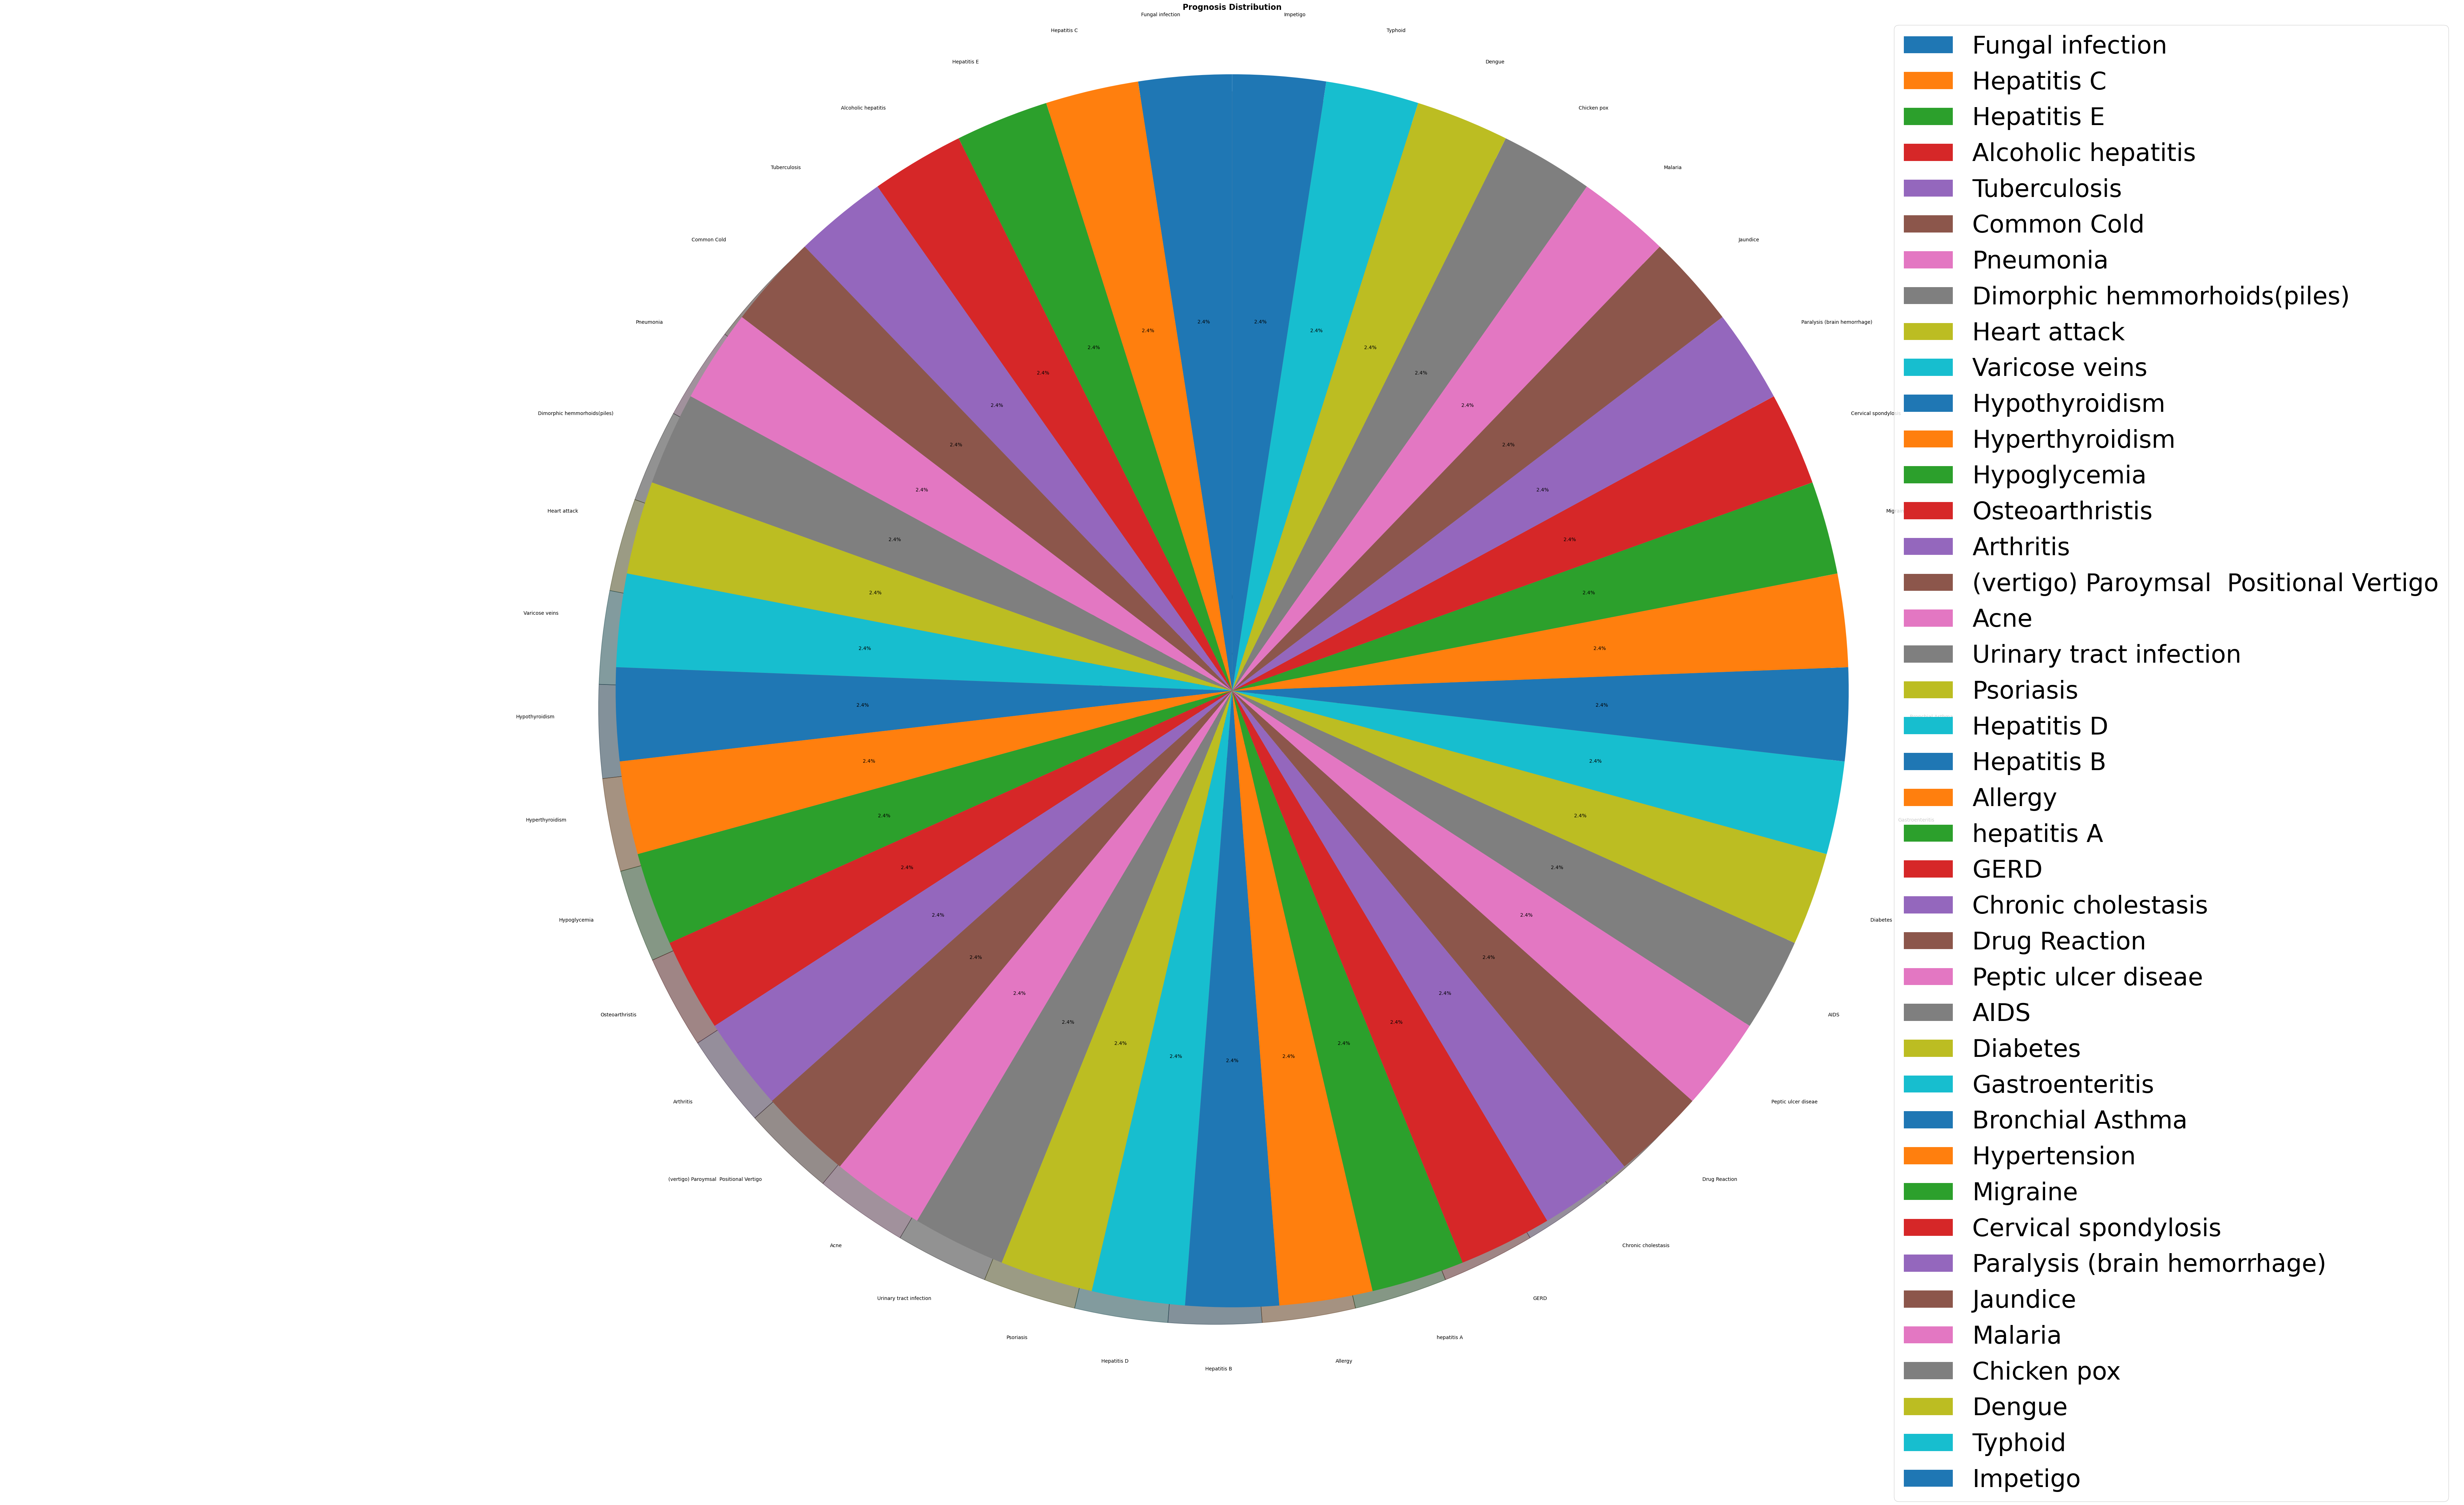

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(90, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

## Data Visualization

### Heatmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Compute correlation matrix
corr_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(100, 80))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Heatmap')
plt.show()




NameError: name 'df' is not defined

### Cross-Tabulation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()


NameError: name 'df' is not defined

### Split The Dataset

In [9]:
x = df.drop('prognosis', axis = 1)
y = df['prognosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Models Training and Evaluation

In [10]:
# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_acc = accuracy_score(y_test, tree_pred)

print("Decision Tree Classifier:")
print("Accuracy on test set: {:.2f}%".format(tree_acc * 100))

Decision Tree Classifier:
Accuracy on test set: 100.00%


In [11]:
# Random Forest Classifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
forest_pred = forest.predict(x_test)
forest_acc = accuracy_score(y_test, forest_pred)

print("Random Forest Classifier:")
print("Accuracy on test set: {:.2f}%".format(forest_acc * 100))

Random Forest Classifier:
Accuracy on test set: 100.00%


In [12]:
# Logistic Regression Classifier
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(y_test, logreg_pred)
logreg_confidence = logreg.predict_proba(x_test)

print("Logistic Regression Classifier:")
print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))

# Print confidence scores for Logistic Regression predictions
print("Confidence scores for Logistic Regression predictions:")
print(logreg_confidence)

Logistic Regression Classifier:
Accuracy on test set: 100.00%
Confidence scores for Logistic Regression predictions:
[[1.22808611e-03 2.83049596e-03 9.20279014e-01 ... 3.00140248e-03
  1.58406980e-03 4.13225204e-04]
 [1.70227182e-04 3.75490345e-04 9.89681822e-01 ... 3.96491089e-04
  2.17522351e-04 5.85306105e-05]
 [4.22994046e-05 1.40963799e-04 1.82123188e-04 ... 1.91949795e-04
  2.22990497e-04 6.21754974e-05]
 ...
 [2.47720978e-04 2.34021313e-04 2.26530922e-04 ... 2.47724443e-04
  1.14461556e-04 3.52243957e-05]
 [5.68839030e-05 1.74076521e-04 1.87623456e-04 ... 2.06504651e-04
  2.52151987e-04 1.77737635e-05]
 [8.62838785e-04 2.02390803e-04 3.24345368e-04 ... 7.08377112e-05
  1.71079095e-04 7.91633186e-04]]


## Saving the Model


In [13]:
import pickle

# Assuming you have a logistic regression model named 'logistic_regression_model'

# Save the model to a file using pickle
with open("logistic_regression_model.pkl", "wb") as file:
    pickle.dump(logreg, file)

In [14]:
z=[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
z_reshaped = np.array(z).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg.predict_proba(z_reshaped)
print(logreg_confidence)
logreg_pred = logreg.predict(z_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[1.15063883e-03 2.54495474e-03 1.08678027e-02 1.13356343e-03
  3.33633751e-03 2.13274777e-03 1.38564869e-03 2.20609465e-03
  3.47399658e-03 4.92816114e-03 4.35736956e-04 5.34860375e-04
  9.47295483e-04 2.38286727e-03 2.71933635e-02 8.95604250e-01
  1.25363925e-03 2.77402627e-03 2.60053630e-03 1.10444587e-03
  1.09986218e-03 1.57310258e-04 2.10014822e-04 1.90664159e-03
  7.68015558e-04 5.04880790e-04 7.77928199e-04 6.76481804e-03
  2.23761612e-03 6.14357494e-04 1.13338856e-03 1.69198060e-03
  2.37239556e-03 1.28156231e-03 6.56621991e-04 4.86440585e-03
  2.13229715e-04 3.53729984e-04 2.51845376e-03 1.53346466e-03
  3.48354580e-04]]
['Fungal infection']
Maximum confidence: 0.8956042501090863


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<html>
<head>
</head>
<body>
  <h1>Conclusion and Recommendations</h1>
  <p>The provided code demonstrates various steps in the machine learning pipeline, including data visualization, model training and evaluation, and model saving. Here are the key findings:</p>
  
  <h2>Data Visualization</h2>
  <p>Data visualization was performed using pie charts to show the distribution of the 'prognosis' variable in the dataset. Additionally, a correlation heatmap was created to visualize the relationships between different features.</p>
  
  <h2>Model Training and Evaluation</h2>
  <p>Three machine learning models were trained and evaluated:</p>
  <ul>
    <li>Decision Tree Classifier: Achieved 100% accuracy on the test set.</li>
    <li>Random Forest Classifier: Also achieved 100% accuracy on the test set.</li>
    <li>Logistic Regression Classifier: Achieved 100% accuracy on the test set. Confidence scores for the predictions were printed.</li>
  </ul>
  
  <h2>Saving the Model</h2>
  <p>The trained Logistic Regression model was saved using the pickle library for future use.</p>
  
  <h2>Sample Prediction</h2>
  <p>A sample input was provided, and the saved Logistic Regression model was used to make predictions. The predicted class was 'Fungal infection' with a maximum confidence score of 0.8956.</p>
  
  <h2>Recommendations</h2>
  <p>While the models achieved high accuracy on the test set, it is important to further analyze the dataset and evaluate the models using appropriate metrics. Consider the specific requirements and domain knowledge to draw meaningful conclusions and make recommendations. It is also recommended to perform feature engineering, hyperparameter tuning, and cross-validation to ensure robust model performance.</p>
</body>
</html>
